In [1]:
!pip install --upgrade pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=ca289dda845ff5b047c50815097594fb7da296ef5100919933bffdd02d525c90
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard.csv


## 2. Importing of the libraries

In [4]:
# Import the required libraries

import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import shap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


2024-07-18 16:50:50.593617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 16:50:50.593790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 16:50:50.731971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Suppress warnings
warnings.filterwarnings("ignore")

## 3. Loading of the dataset

In [6]:
df = pd.read_csv('/kaggle/input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

### 4 Exploration of dataset and visualization

In [7]:
# Checking the missing values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64


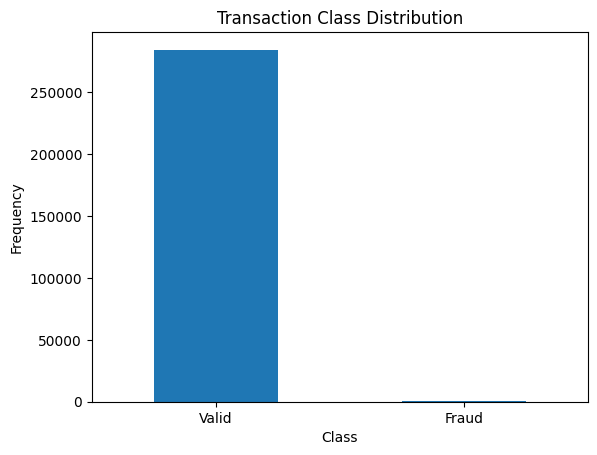

In [9]:
# Calculate the count of each class (fraudulent and valid transactions)
count_classes = pd.value_counts(df['Class'], sort=True)

# Display the count of each class
print("Class Counts:")
print(count_classes)

# Plotting the distribution of transaction classes
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Valid', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [10]:
#Assigning the transaction class "0 = NORMAL  & 1 = FRAUD"
Normal = df[df['Class']==0]
Fraud = df[df['Class']==1]

In [11]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

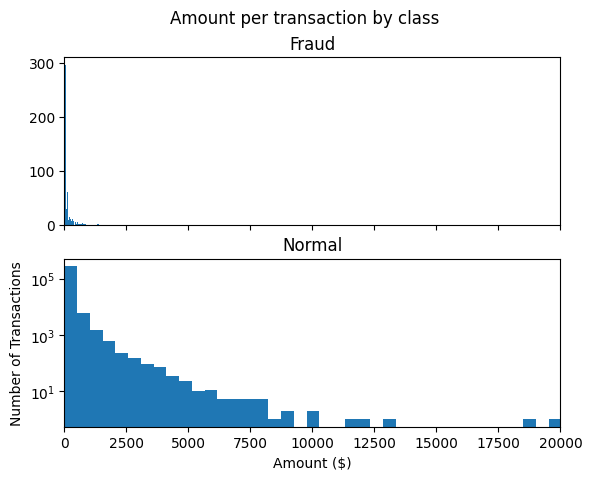

In [13]:
#Let's have a more graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

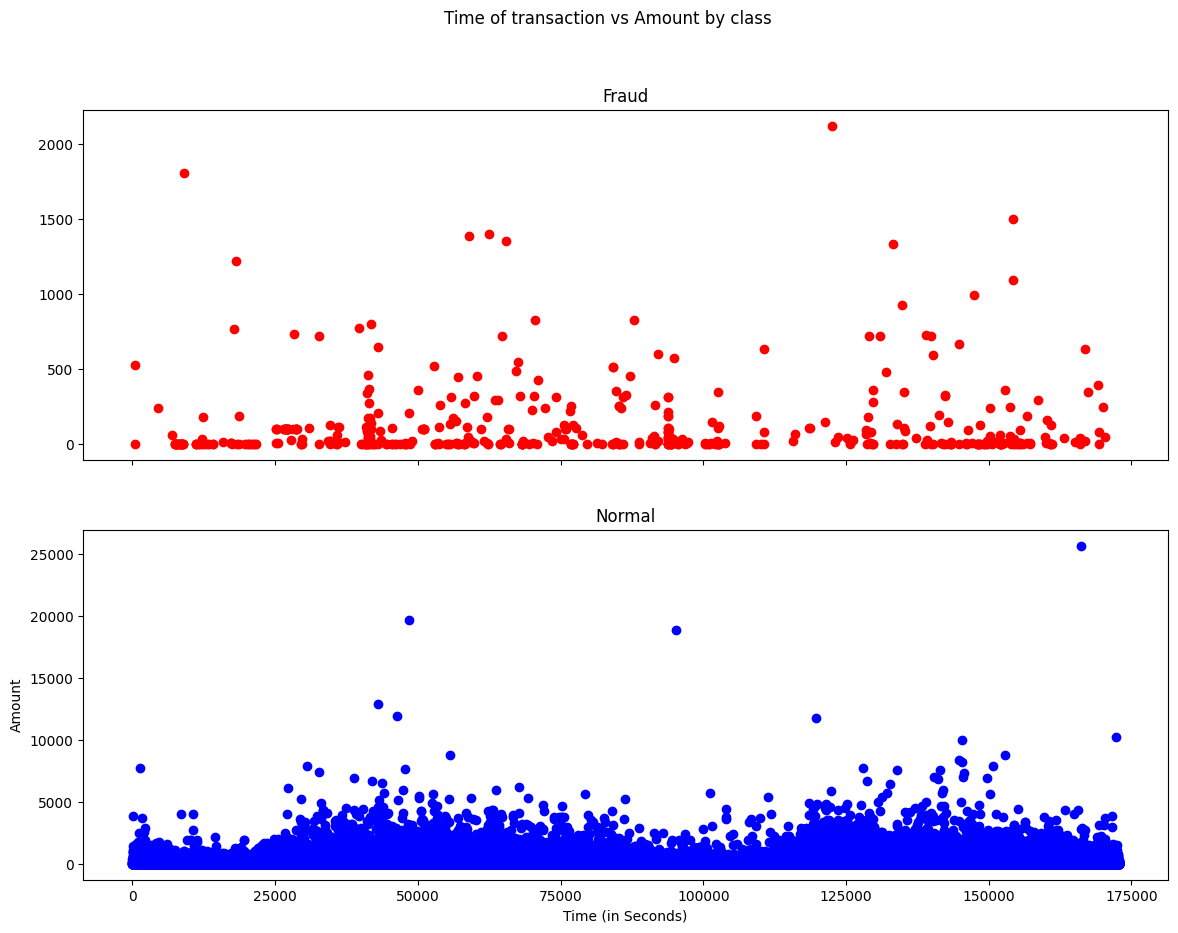

In [14]:

# Plotting
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 10))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fraud['Time'], Fraud['Amount'], color='red')
ax1.set_title('Fraud')

ax2.scatter(Normal['Time'], Normal['Amount'], color='blue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

### 5. Correlation 

In [15]:
# Calculate correlation matrix
corr_matrix = df.corr()
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


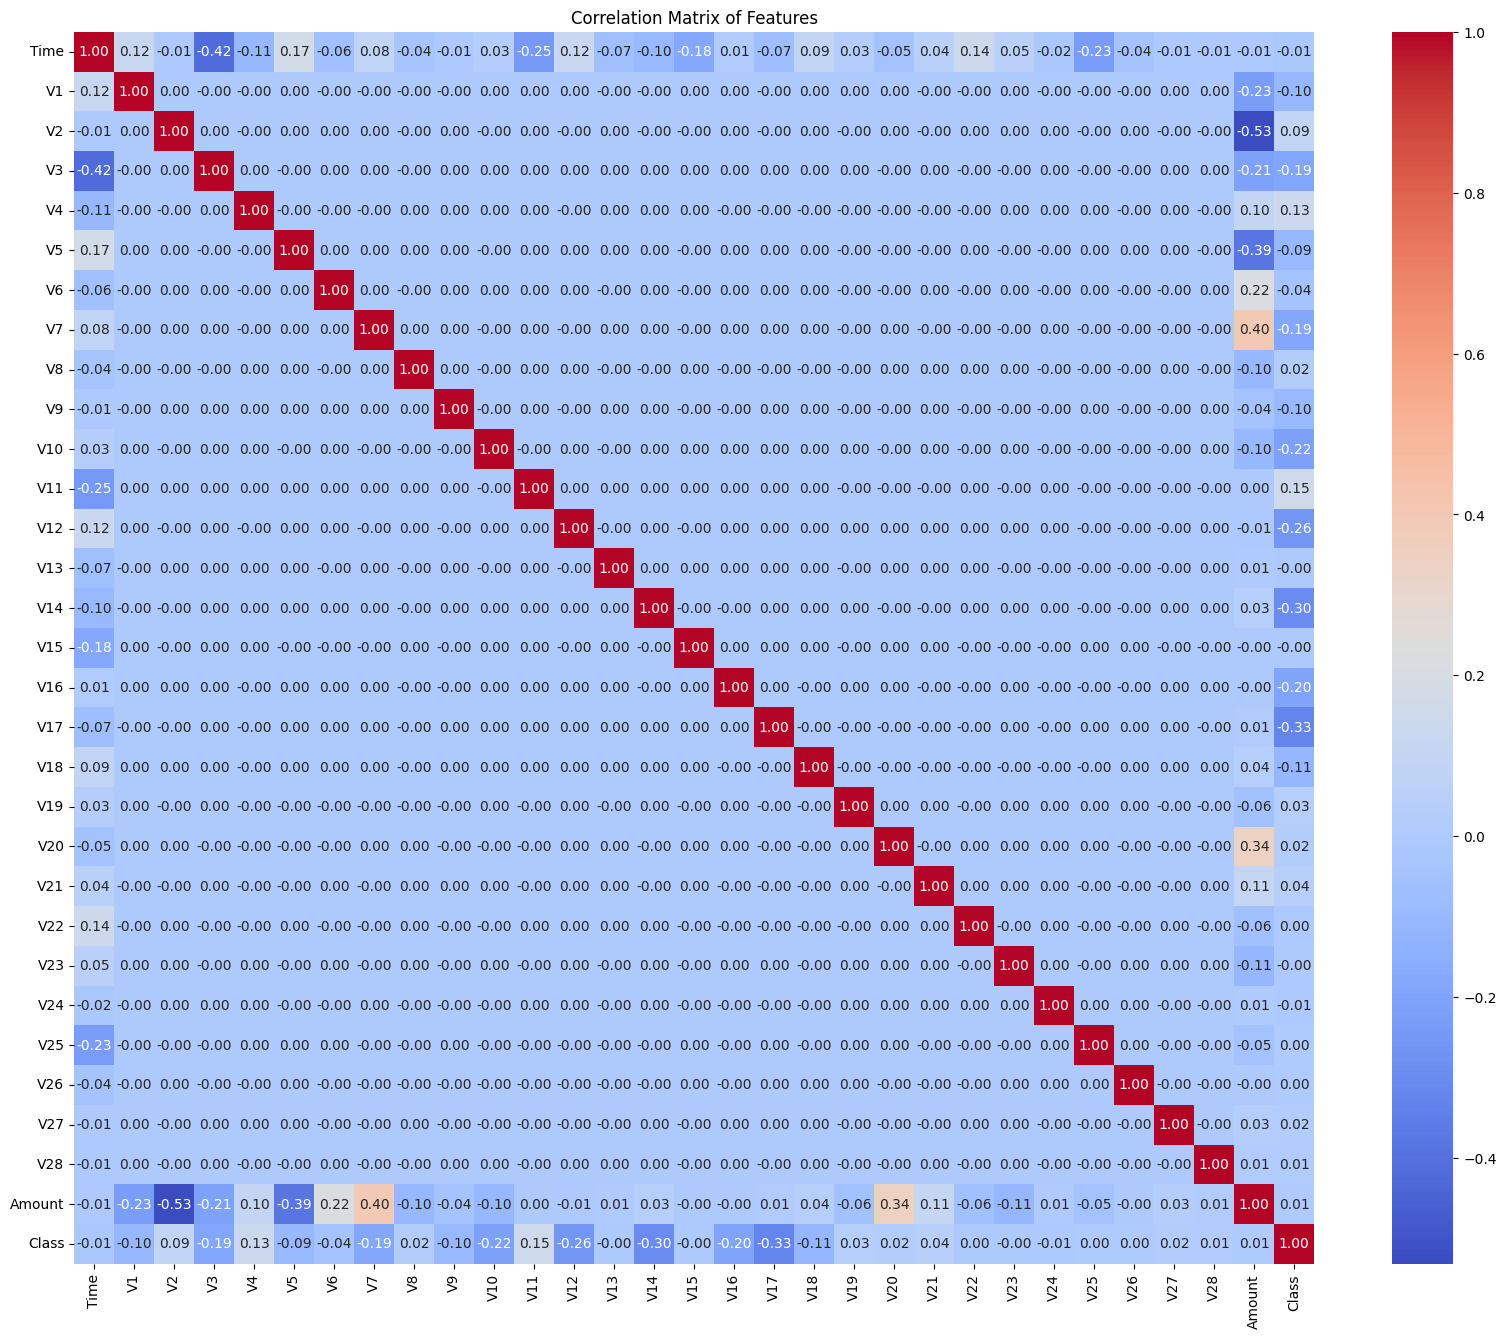

In [16]:
# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [17]:
# Calculate correlation of 'Amount' and 'Class' with other features
corr_with_amount = df.corr()['Amount'].drop('Amount')
corr_with_class = df.corr()['Class'].drop('Class')

In [18]:
# Display correlations
print("Correlation with Amount:")
print(corr_with_amount)

print("\nCorrelation with Class:")
print(corr_with_class)

Correlation with Amount:
Time    -0.010596
V1      -0.227709
V2      -0.531409
V3      -0.210880
V4       0.098732
V5      -0.386356
V6       0.215981
V7       0.397311
V8      -0.103079
V9      -0.044246
V10     -0.101502
V11      0.000104
V12     -0.009542
V13      0.005293
V14      0.033751
V15     -0.002986
V16     -0.003910
V17      0.007309
V18      0.035650
V19     -0.056151
V20      0.339403
V21      0.105999
V22     -0.064801
V23     -0.112633
V24      0.005146
V25     -0.047837
V26     -0.003208
V27      0.028825
V28      0.010258
Class    0.005632
Name: Amount, dtype: float64

Correlation with Class:
Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V

In [ ]:


# Combine the correlations into a single DataFrame
correlation_df = pd.DataFrame({
    'Correlation with Amount': corr_with_amount,
    'Correlation with Class': corr_with_class
})

# Plot the correlations
correlation_df.plot(kind='bar', figsize=(18, 10), colormap='coolwarm')
plt.title('Correlation of Features with Amount and Class')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

### 6. Visualization of Anomalies using PCA

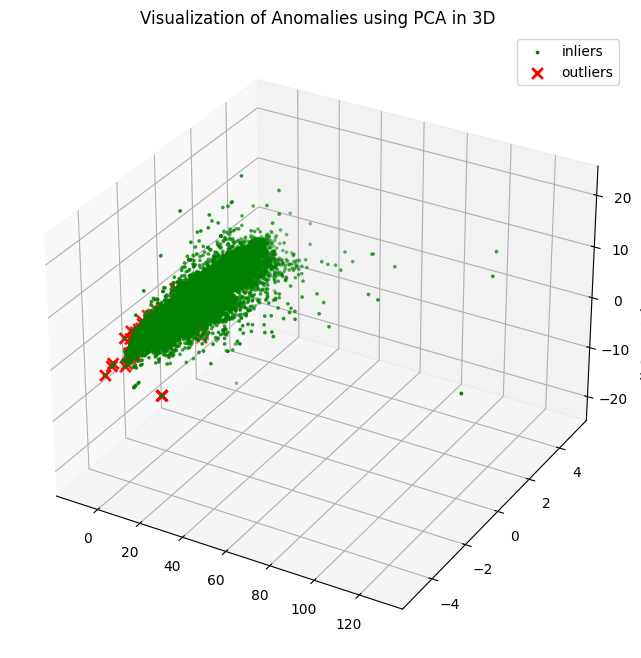

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


# Extract the columns for modeling we are removing the class column
to_model_cols = df.columns[0:30] 

# Identify outliers based on 'Class' column
outliers = df.loc[df['Class'] == 1]
outlier_index = list(outliers.index)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df[to_model_cols])

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
X_reduce = pca.fit_transform(X)

# Plotting
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_PCA")

# Plot inliers (green points)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=3, lw=1, label="inliers", c="green")

# Plot outliers (red crosses)
ax.scatter(X_reduce[outlier_index, 0], X_reduce[outlier_index, 1], X_reduce[outlier_index, 2],
           s=60, lw=2, marker="x", c="red", label="outliers")

ax.legend()
plt.title('Visualization of Anomalies using PCA in 3D')
plt.show()


### 7. Model Building

In [8]:
X = df.drop(columns=['Class'])
y = df['Class']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## 7.1 Isolation forest

In [10]:
from pyod.models.iforest import IForest

# Set up the Isolation Forest model with the best parameters
iforest = IForest(contamination=0.01, max_samples=0.5, n_estimators=50)

# Fit the model on the training data
iforest.fit(X_train)

# Predict outlier scores
y_test_scores_iforest = iforest.decision_function(X_test)

# Print some example scores
print("Example test set outlier scores (Isolation Forest):")
print(y_test_scores_iforest[:10])

# Calculate ROC AUC
roc_auc_iforest = roc_auc_score(y_test, y_test_scores_iforest)
print(f'Isolation Forest ROC AUC Score: {roc_auc_iforest:.4f}')


Example test set outlier scores (Isolation Forest):
[ 0.27374724 -0.07758514 -0.0964223  -0.0952579  -0.099191   -0.08408554
 -0.103177   -0.08870218 -0.09243667 -0.07038135]
Isolation Forest ROC AUC Score: 0.9584


## 7.2 One-Class Support Vector Machine

from pyod.models.ocsvm import OCSVM
from sklearn.metrics import roc_auc_score

# Set up the OCSVM model with the best parameters
ocsvm = OCSVM(gamma='auto', kernel='rbf', nu=0.1)

# Fit the model on the training data
ocsvm.fit(X_train)

# Predict outlier scores
y_test_scores_ocsvm = ocsvm.decision_function(X_test)

# Print some example scores
print("Example test set outlier scores (OCSVM):")
print(y_test_scores_ocsvm[:10])

# Calculate ROC AUC
roc_auc_ocsvm = roc_auc_score(y_test, y_test_scores_ocsvm)
print(f'OCSVM ROC AUC Score: {roc_auc_ocsvm:.4f}')


## 7.3 Gaussian Mixture Model

In [23]:
from pyod.models.gmm import GMM

# Set up the GMM model with the best parameters
gmm = GMM(contamination=0.001, covariance_type='full', n_components=1)

# Fit the model on the training data
gmm.fit(X_train)

# Predict outlier scores
y_test_scores_gmm = gmm.decision_function(X_test)

# Print some example scores
print("Example test set outlier scores (GMM):")
print(y_test_scores_gmm[:10])

# Calculate ROC AUC
roc_auc_gmm = roc_auc_score(y_test, y_test_scores_gmm)
print(f'GMM ROC AUC Score: {roc_auc_gmm:.4f}')


Example test set outlier scores (GMM):
[1004.88397961   40.94391168   34.34912514   33.00233863   31.06876476
   43.7735189    30.1959443    37.50120885   35.16691748   71.79509822]
GMM ROC AUC Score: 0.9598


## 7.4 Autoencoder

In [24]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  # You can change this value
hidden_dim = int(encoding_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          validation_split=0.2,
                          verbose=1)

# Predict the reconstruction of the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Print some example scores
print("Example test set reconstruction errors (Autoencoder):")
print(mse[:10])

# Calculate ROC AUC
roc_auc_autoencoder = roc_auc_score(y_test, mse)
print(f'Autoencoder ROC AUC Score: {roc_auc_autoencoder:.4f}')


Epoch 1/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.9718 - val_loss: 0.8798
Epoch 2/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8713 - val_loss: 0.8546
Epoch 3/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8603 - val_loss: 0.8451
Epoch 4/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8395 - val_loss: 0.8388
Epoch 5/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8373 - val_loss: 0.8337
Epoch 6/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8244 - val_loss: 0.8294
Epoch 7/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8209 - val_loss: 0.8273
Epoch 8/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8197 - val_loss: 0.8242
Epoch 9/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8062 - val_loss: 0.8235
Epoch 10/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8424 - val_loss: 0.8220
Epoch 11/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7986 - val_loss: 0.8214
Epoch 12/50
4985/4985 ━━━━━━━

## 8. Visualizing of results

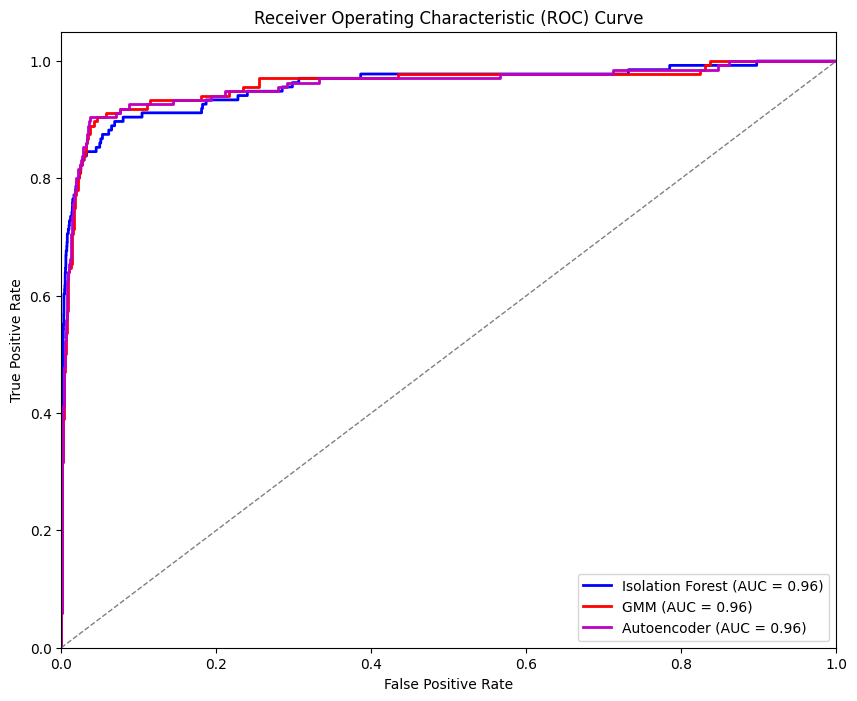

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each model
fpr_iforest, tpr_iforest, _ = roc_curve(y_test, y_test_scores_iforest)
roc_auc_iforest = roc_auc_score(y_test, y_test_scores_iforest)

#fpr_ocsvm, tpr_ocsvm, _ = roc_curve(y_test, y_test_scores_ocsvm)
#roc_auc_ocsvm = roc_auc_score(y_test, y_test_scores_ocsvm)

fpr_gmm, tpr_gmm, _ = roc_curve(y_test, y_test_scores_gmm)
roc_auc_gmm = roc_auc_score(y_test, y_test_scores_gmm)

fpr_autoencoder, tpr_autoencoder, _ = roc_curve(y_test, mse)
roc_auc_autoencoder = roc_auc_score(y_test, mse)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_iforest, tpr_iforest, color='b', lw=2, label=f'Isolation Forest (AUC = {roc_auc_iforest:.2f})')
#plt.plot(fpr_ocsvm, tpr_ocsvm, color='g', lw=2, label=f'OCSVM (AUC = {roc_auc_ocsvm:.2f})')
plt.plot(fpr_gmm, tpr_gmm, color='r', lw=2, label=f'GMM (AUC = {roc_auc_gmm:.2f})')
plt.plot(fpr_autoencoder, tpr_autoencoder, color='m', lw=2, label=f'Autoencoder (AUC = {roc_auc_autoencoder:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


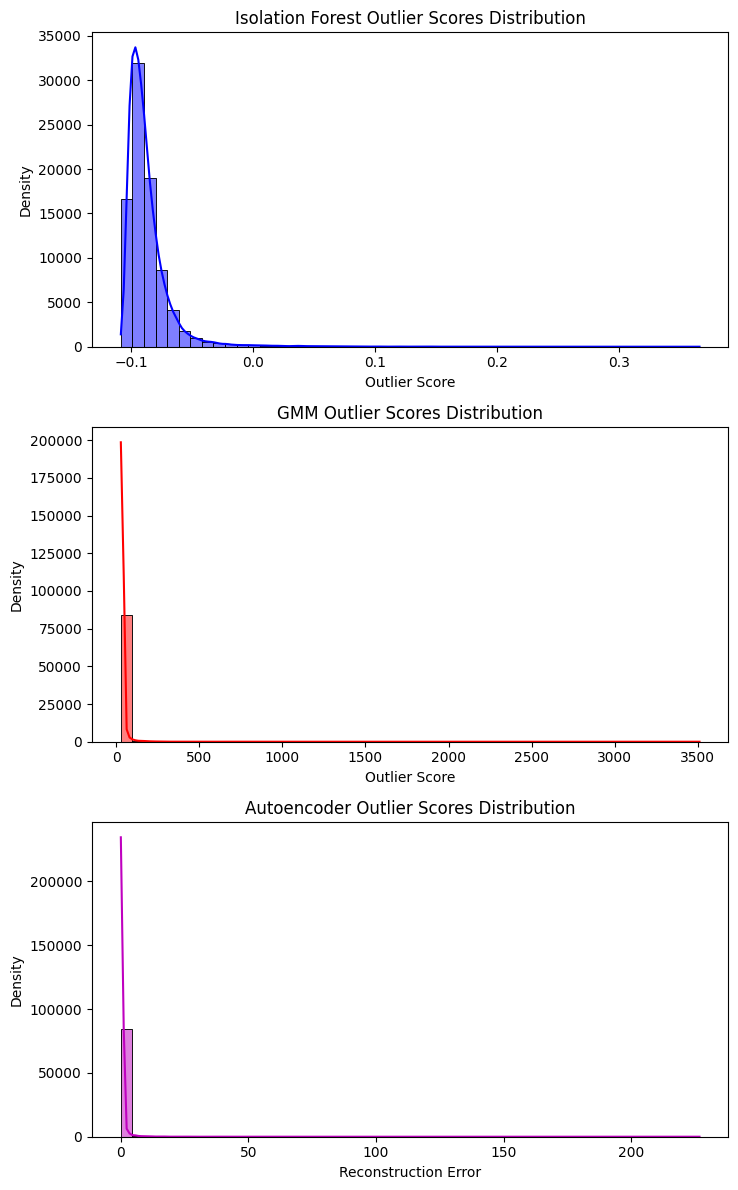

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each model
plt.figure(figsize=(14, 12))

# Isolation Forest
plt.subplot(3, 2, 1)
sns.histplot(y_test_scores_iforest, kde=True, color='b', bins=50)
plt.title('Isolation Forest Outlier Scores Distribution')
plt.xlabel('Outlier Score')
plt.ylabel('Density')

# OCSVM
#plt.subplot(3, 2, 2)
#sns.histplot(y_test_scores_ocsvm, kde=True, color='g', bins=50)
#plt.title('OCSVM Outlier Scores Distribution')
#plt.xlabel('Outlier Score')
#plt.ylabel('Density')

# GMM
plt.subplot(3, 2, 3)
sns.histplot(y_test_scores_gmm, kde=True, color='r', bins=50)
plt.title('GMM Outlier Scores Distribution')
plt.xlabel('Outlier Score')
plt.ylabel('Density')

# Autoencoder
plt.subplot(3, 2, 5)
sns.histplot(mse, kde=True, color='m', bins=50)
plt.title('Autoencoder Outlier Scores Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
# Create a SHAP explainer for the Isolation Forest
explainer_iforest = shap.Explainer(iforest, X_train)
shap_values_iforest = explainer_iforest(X_test)

# Select an instance to explain (e.g., the first instance in the test set)
instance_index = 0
instance = X_test[instance_index]

# Generate SHAP values for the selected instance
shap_values_instance = explainer_iforest(instance)

# Plot the SHAP waterfall plot for the selected instance
shap.waterfall_plot(shap_values_instance)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Scatter plot of the PCA-reduced test data, color-coded by true class
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm')
plt.title("PCA Visualization of Anomalies")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class', ticks=[0, 1])
plt.show()


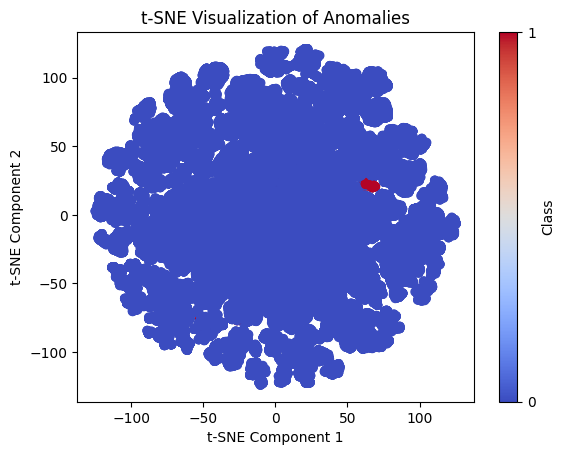

In [17]:
from sklearn.manifold import TSNE

# Reduce dimensions to 2 using t-SNE for visualization
tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test)

# Scatter plot of the t-SNE-reduced test data, color-coded by true class
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='coolwarm')
plt.title("t-SNE Visualization of Anomalies")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Class', ticks=[0, 1])
plt.show()


In [16]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='regression')

# Explain a prediction (example)
exp = explainer.explain_instance(X_test[0], iforest.predict, num_features=5)
exp.show_in_notebook(show_table=True)


       feature  importance
28  Feature_28    0.036186
7    Feature_7    0.036090
29  Feature_29    0.035584
10  Feature_10    0.035514
8    Feature_8    0.034924
17  Feature_17    0.034874
26  Feature_26    0.034727
27  Feature_27    0.034354
6    Feature_6    0.034315
4    Feature_4    0.034083
21  Feature_21    0.034082
1    Feature_1    0.034024
22  Feature_22    0.033770
3    Feature_3    0.033520
0    Feature_0    0.033144
9    Feature_9    0.032951
14  Feature_14    0.032887
16  Feature_16    0.032794
12  Feature_12    0.032645
23  Feature_23    0.032485
20  Feature_20    0.032334
25  Feature_25    0.032184
19  Feature_19    0.032149
2    Feature_2    0.031869
15  Feature_15    0.031831
18  Feature_18    0.031713
24  Feature_24    0.031489
13  Feature_13    0.031460
5    Feature_5    0.031090
11  Feature_11    0.030927


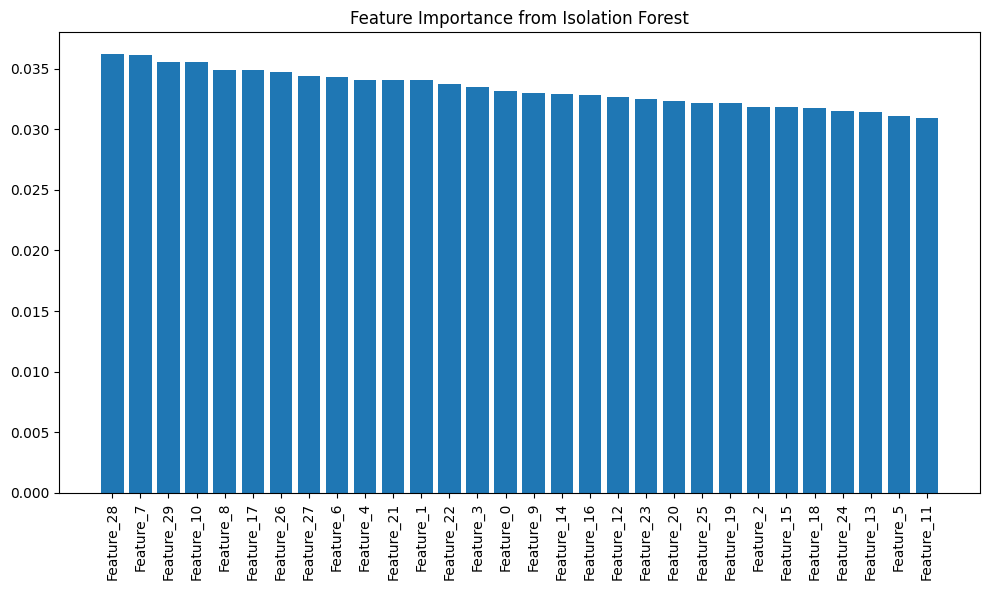

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'iforest' is your trained Isolation Forest model
# and X_test is a numpy array

# Create feature names (if you don't have them already)
feature_names = [f'Feature_{i}' for i in range(X_test.shape[1])]

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': iforest.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance from Isolation Forest')
plt.tight_layout()
plt.show()